In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [30]:
a=pd.read_csv('/content/NVDA_train_dataset.csv')


In [31]:
data_train=pd.DataFrame(a['Close'])

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [32]:
data_train_scale = scaler.fit_transform(data_train)

In [33]:
data_train_scale.shape

(1006, 1)

In [34]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [35]:
x, y = np.array(x), np.array(y)

In [36]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [38]:
model.fit(x,y, epochs = 100, batch_size =32, verbose =1)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - loss: 0.0924
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 258ms/step - loss: 0.0112
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 291ms/step - loss: 0.0082
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 267ms/step - loss: 0.0084
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 231ms/step - loss: 0.0085
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - loss: 0.0062
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 272ms/step - loss: 0.0060
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 293ms/step - loss: 0.0070
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step - loss: 0.0062
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 235ms/step - loss: 0.0049
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 292ms/step - loss: 0.0057
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 282ms/step - loss: 0.0062
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 234ms/step - loss: 0.0064
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 295ms/step - loss: 0.0065
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━

In [39]:
b=pd.read_csv('/content/NVDA.csv')

In [40]:
data_test=pd.DataFrame(b['Close'])

In [41]:
data_test_scale  =  scaler.fit_transform(data_test)

In [42]:
X = []
Y = []

for i in range(100, data_test_scale.shape[0]):
    X.append(data_test_scale[i-100:i])
    Y.append(data_test_scale[i,0])
X, Y = np.array(X), np.array(Y)

In [43]:
y_predict = model.predict(X)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step


In [44]:
scale =1/scaler.scale_

In [45]:
y_predict = y_predict*scale

In [46]:
Y = Y*scale

In [47]:
model.export('/results')

Saved artifact at '/results'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 1), dtype=tf.float32, name='keras_tensor_92')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138738884951584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138739188596976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138739188599792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138739188601904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138739188611232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138739188610880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138738884937504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138738884936448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138738884719568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138738884722384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138738884709536: TensorS

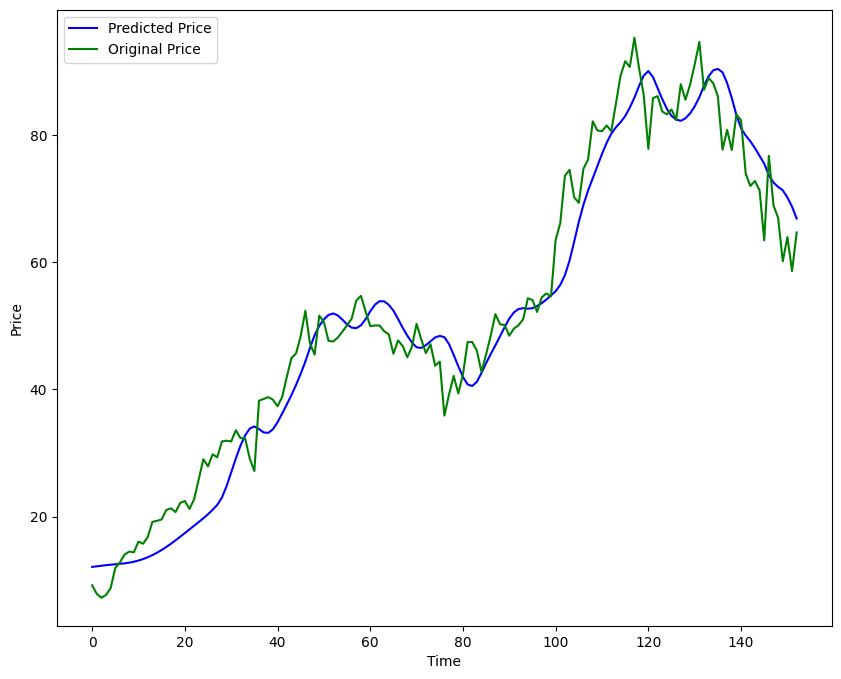

In [48]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'b', label = 'Predicted Price')
plt.plot(Y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
mae = mean_absolute_error(Y, y_predict)
print(f"Mean Absolute Error (MAE): {mae:.2f}")



Mean Absolute Error (MAE): 4.34


In [51]:
# 2. Mean Squared Error (MSE)
mse = mean_squared_error(Y, y_predict)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# 3. Root Mean Squared Error (RMSE)


Mean Squared Error (MSE): 28.38


In [52]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 4. R-squared (R²)


Root Mean Squared Error (RMSE): 5.33


In [53]:
r2 = r2_score(Y, y_predict)
print(f"R-squared (R²): {r2:.2f}")

# Optional: Plotting the results to visualize the predictions


R-squared (R²): 0.95
